## Background
Cyclistic is a thriving company that provides a service for bike-sharing in two different use models: members and casual users. Members are users with annual passes for bikes, The financial team of the company suggest that they represent a bigger revenue stream for the company.

This Data Set is provided by Divvy bike sharing company of Chicago : https://divvy-tripdata.s3.amazonaws.com/index.html


## Purpose
This analysis aims to discover the ways in which casual users differ from members and the parameters which may affect the comversion of casual users to members 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('total_tripdata.csv')

C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,7,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.661,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.623,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.903,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


In [4]:
df.describe()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
count,5088221,5088220,5088220,5088220,4806152,4805526,4772223,4771762,5.088220e+06,5.088220e+06,5.082046e+06,5.082046e+06,5088220
unique,5087999,4,3901857,3890194,723,1942,722,1940,4.499720e+05,4.367660e+05,4.899780e+05,4.641740e+05,3
top,ride_id,docked_bike,8/7/2020 18:09,8/22/2020 14:37,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,4.189228e+01,-8.761204e+01,4.189228e+01,-8.761204e+01,member
freq,14,2678252,66,72,63015,30569,65456,30890,5.003400e+04,5.002900e+04,5.211900e+04,5.211700e+04,2893632


In [5]:
df['member_casual'].value_counts()

member           2893632
casual           2194574
member_casual         14
Name: member_casual, dtype: int64

In [19]:
df[df['member_casual'] == 'member_casual']

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
84776,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
285051,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
628057,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1179538,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1801900,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
2334859,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
2723513,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
2983230,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
3114804,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
3211639,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [20]:
df.drop(df[df['member_casual'] == 'member_casual'].index,inplace = True)

In [21]:
df[df['member_casual'] == 'member_casual']

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


## Some general EDA 
### Amount of trips per type of user
Exploring the distribution of data among user type and rideable type.

<AxesSubplot:xlabel='rideable_type', ylabel='count'>

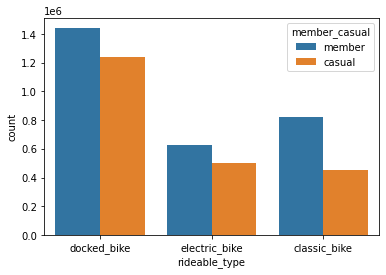

In [22]:
sns.countplot(x = 'rideable_type' , hue = 'member_casual',data = df)

<AxesSubplot:xlabel='member_casual', ylabel='count'>

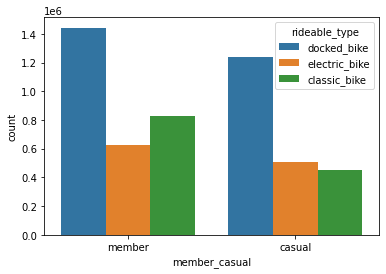

In [26]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'member_casual' , hue = 'rideable_type',data = df)

We find the following:

* Casual users make higher number of trips as compared to members with annual passes

* Docked Bikes are the most popular type and commonly used bikes by both

##### Activity of users Monthwise and Daywise
Now we are interested in seeing the variation overtime per user type.

In [27]:
import datetime as dt

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5088207 entries, 0 to 5088220
Data columns (total 13 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   ride_id             object
 1   rideable_type       object
 2   started_at          object
 3   ended_at            object
 4   start_station_name  object
 5   start_station_id    object
 6   end_station_name    object
 7   end_station_id      object
 8   start_lat           object
 9   start_lng           object
 10  end_lat             object
 11  end_lng             object
 12  member_casual       object
dtypes: object(13)
memory usage: 543.5+ MB


In [40]:
df['started_at'] = pd.to_datetime(df['started_at'])

In [41]:
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [42]:
df['started_at']

0         2020-04-26 17:45:14
1         2020-04-17 17:08:54
2         2020-04-01 17:54:13
3         2020-04-07 12:50:19
4         2020-04-18 10:22:59
                  ...        
5088216   2021-06-30 17:35:10
5088217   2021-06-13 19:24:30
5088218   2021-06-08 15:44:28
5088219   2021-06-03 16:18:38
5088220                   NaT
Name: started_at, Length: 5088207, dtype: datetime64[ns]

In [44]:
df['started_at'].iloc[0].year

2020

In [45]:
df['Year'] = df['started_at'].apply(lambda x: x.year)
df['Month'] = df['started_at'].apply(lambda x: x.month )
df['Day of Week'] = df['started_at'].apply(lambda x: x.dayofweek)


In [50]:
df1 = df.groupby(['Year','Month','member_casual']).count()

In [53]:
df1

ride_id  rideable_type  started_at  ended_at  \
Year   Month member_casual                                                 
2020.0 4.0   casual           23628          23628       23628     23628   
             member           61148          61148       61148     61148   
       5.0   casual           86909          86909       86909     86909   
             member          113365         113365      113365    113365   
       6.0   casual          154718         154718      154718    154718   
             member          188287         188287      188287    188287   
       7.0   casual          269296         269296      269296    269296   
             member          282184         282184      282184    282184   
       8.0   casual          289661         289661      289661    289661   
             member          332700         332700      332700    332700   
       9.0   casual          230692         230692      230692    230692   
             member          302266         302266      302266    302266   
       10.0  casual          145012         145012      145012    145012   
             member          243641         243641      243641    243641   
       11.0  casual           88099          88099       88099     88099   
             member          171617         171617      171617    171617   
       12.0  casual           30080          30080       30080     30080   
             member          101493         101493      101493    101493   
2021.0 1.0   casual           18117          18117       18117     18117   
             member           78717          78717       78717     78717   
       2.0   casual           10131          10131       10131     10131   
             member           39491          39491       39491     39491   
       3.0   casual           84033          84033       84033     84033   
             member          144463         144463      144463    144463   
       4.0   casual          136601         136601      136601    136601   
             member          200629         200629      200629    200629   
       5.0   casual          256916         256916      256916    256916   
             member          274717         274717      274717    274717   
       6.0   casual          370681         370681      370681    370681   
             member          358914         358914      358914    358914   

                            start_station_name  start_station_id  \
Year   Month member_casual                                         
2020.0 4.0   casual                      23628             23628   
             member                      61148             61148   
       5.0   casual                      86909             86909   
             member                     113365            113365   
       6.0   casual                     154718            154718   
             member                     188287            188287   
       7.0   casual                     269214            269211   
             member                     282117            282117   
       8.0   casual                     286401            286356   
             member                     328365            328314   
       9.0   casual                     221987            221866   
             member                     291280            291191   
       10.0  casual                     131742            131615   
             member                     225713            225633   
       11.0  casual                      78742             78684   
             member                     156650            156598   
       12.0  casual                      26516             26516   
             member                      93358             93358   
2021.0 1.0   casual                      15916             15916   
             member                      72293             72293   
       2.0   casual                       9219              9219   
             member            

In [55]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Year,Month,Day of Week
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.661,41.9322,-87.6586,member,2020.0,4.0,6.0
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,2020.0,4.0,4.0
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.623,member,2020.0,4.0,2.0
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.903,-87.6975,41.8992,-87.6722,member,2020.0,4.0,1.0
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,2020.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5088216,47BD346FAFB9BE6D,classic_bike,2021-06-30 17:35:10,2021-06-30 17:43:20,Clark St & Chicago Ave,13303,Kingsbury St & Kinzie St,KA1503000043,41.89675,-87.63089,41.889177,-87.638506,member,2021.0,6.0,2.0
5088217,52467C23D17C6AFE,classic_bike,2021-06-13 19:24:30,2021-06-13 19:34:11,Indiana Ave & 26th St,TA1307000005,State St & 19th St,SL-013,41.845687,-87.622481,41.856594,-87.627542,member,2021.0,6.0,6.0
5088218,7DF6D74420D7D9E6,electric_bike,2021-06-08 15:44:28,2021-06-08 16:15:01,Clark St & Chicago Ave,13303,NaN,NaN,41.896485,-87.630608,41.94,-87.71,member,2021.0,6.0,1.0
5088219,0C01F8BA99E512E5,electric_bike,2021-06-03 16:18:38,2021-06-03 16:47:49,Clark St & Chicago Ave,13303,NaN,NaN,41.896596,-87.630868,41.94,-87.71,member,2021.0,6.0,3.0


<AxesSubplot:xlabel='Month', ylabel='count'>

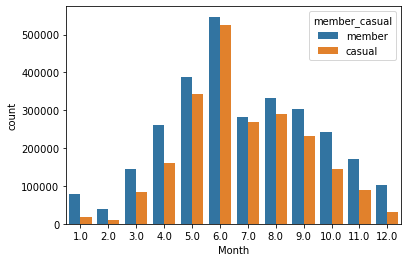

In [60]:
sns.countplot(x = 'Month',data = df,hue = 'member_casual')

<AxesSubplot:xlabel='Month', ylabel='count'>

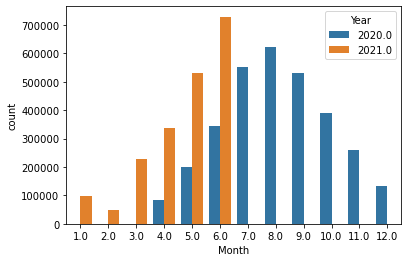

In [61]:
sns.countplot(x = 'Month',data = df,hue = 'Year')

#### From this visualization we can see that:

* Members make consistently more trips than casual users.

* Both types of user follow similar trends in the amount of trips they make.

* we notice a key change of pattern over the end of 2020 and start of 2021 further anaysis in 2021 may help us refine our decision



No handles with labels found to put in legend.


<AxesSubplot:xlabel='Day of Week', ylabel='count'>

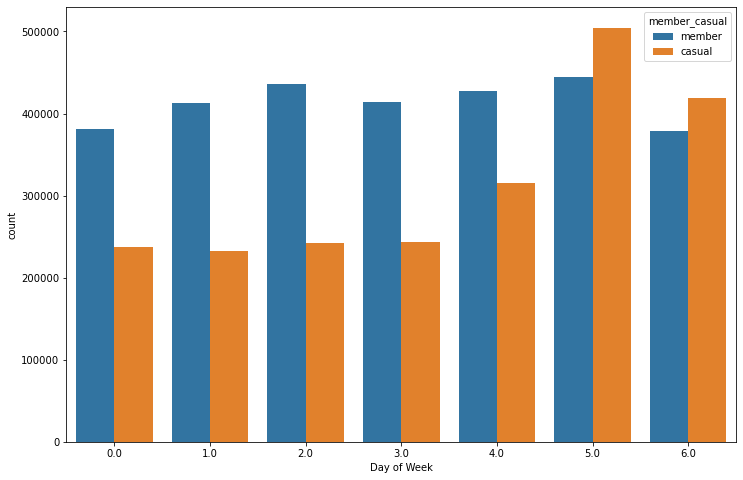

In [63]:
plt.figure(figsize = (12,8))
plt.legend(loc = 'upper right')
sns.countplot(x = 'Day of Week',data = df,hue = 'member_casual')

#### From this visualization we can see the following:

* Members have a more steady daily trips count per day. Their most active week day is Wednesday.

* Casual users are much more active on weekends. The upward trend starts on Fridays and on Saturdays they even surpass the amount of trips taken by Members.

* The least active day of the week for casual users is Tuesday.


In [64]:
df['ride_length'] = df['ended_at']-df['started_at']

In [65]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Year,Month,Day of Week,ride_length
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.661,41.9322,-87.6586,member,2020.0,4.0,6.0,0 days 00:26:49
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,2020.0,4.0,4.0,0 days 00:08:09
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.623,member,2020.0,4.0,2.0,0 days 00:14:23
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.903,-87.6975,41.8992,-87.6722,member,2020.0,4.0,1.0,0 days 00:12:12
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,2020.0,4.0,5.0,0 days 00:52:55


In [75]:
df['ride_length'] = df['ride_length'].apply(lambda x: x.total_seconds()/60)

In [110]:
df2 = df.groupby(['member_casual','Day of Week']).sum()

In [111]:
df2

Year      Month   ride_length
member_casual Day of Week                                       
casual        0.0          4.788240e+08  1576168.0  9.768914e+06
              1.0          4.701605e+08  1552383.0  6.599197e+06
              2.0          4.899823e+08  1668934.0  9.239679e+06
              3.0          4.915293e+08  1697477.0  9.643740e+06
              4.0          6.369515e+08  2164921.0  1.283522e+07
              5.0          1.019624e+09  3408385.0  2.244993e+07
              6.0          8.468447e+08  2793402.0  2.015782e+07
member        0.0          7.703145e+08  2591724.0  5.693163e+06
              1.0          8.333076e+08  2809478.0 -2.479994e+06
              2.0          8.803913e+08  3004778.0  6.458204e+06
              3.0          8.373927e+08  2882195.0  6.117161e+06
              4.0          8.629450e+08  2917099.0  6.549915e+06
              5.0          8.974783e+08  2997958.0  7.695428e+06
              6.0          7.644042e+08  2557975.0  6.713758e+06

In [112]:
days = df2.loc['casual'].index

In [113]:
df2.loc['casual']['ride_length']

Day of Week
0.0    9.768914e+06
1.0    6.599197e+06
2.0    9.239679e+06
3.0    9.643740e+06
4.0    1.283522e+07
5.0    2.244993e+07
6.0    2.015782e+07
Name: ride_length, dtype: float64

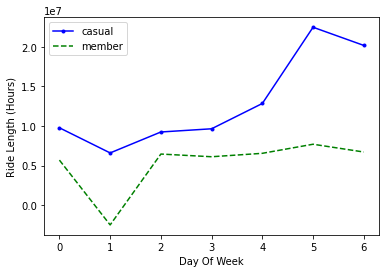

In [115]:
# MATLAB style line color and style 
fig, ax = plt.subplots()
ax.plot(days,df2.loc['casual']['ride_length'], 'b.-',label = 'casual') # blue line with dots
ax.plot(days,df2.loc['member']['ride_length'], 'g--',label = 'member') # green dashed line
ax.set_xlabel("Day Of Week")
ax.set_ylabel("Ride Length (Hours)");
ax.legend()

That is the cumulative time spent on trips by the user type groups but what are the mean and median of the duration per day?

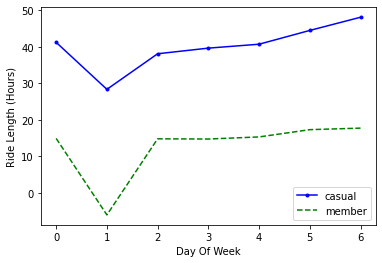

In [118]:
df_mean = df.groupby(['member_casual','Day of Week']).mean()
# MATLAB style line color and style 
fig, ax = plt.subplots()
ax.plot(days,df_mean.loc['casual']['ride_length'], 'b.-',label = 'casual') # blue line with dots
ax.plot(days,df_mean.loc['member']['ride_length'], 'g--',label = 'member') # green dashed line
ax.set_xlabel("Day Of Week")
ax.set_ylabel("Ride Length (Hours)");
ax.legend()

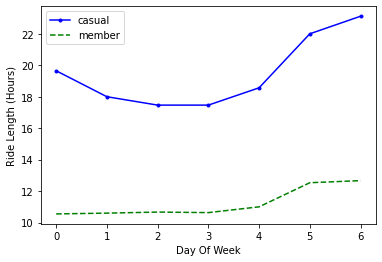

In [120]:
df_median = df.groupby(['member_casual','Day of Week']).median()
# MATLAB style line color and style 
fig, ax = plt.subplots()
ax.plot(days,df_median.loc['casual']['ride_length'], 'b.-',label = 'casual') # blue line with dots
ax.plot(days,df_median.loc['member']['ride_length'], 'g--',label = 'member') # green dashed line
ax.set_xlabel("Day Of Week")
ax.set_ylabel("Ride Length (Hours)");
ax.legend()

### Based on these visualizations we can infer the following:

* Plot 1 - Casual always make longer trips than annual members even during weekdays


* Plot 2 - Members generally use their bike during weekdays to commute to short distances


* Plot 3 -  Casual users and Members have their longest trips during Sundays.

The high trip count of members during week days compared to casual members may indicate that members use bikes more frequently during weekdays


# What can we conclude
In this analysis we have found some important insights between the behavior of Member users compared to Casual users.

## Findings
The most important differences are:

* Member users consistently make more trips per day.

* Casual users take longer trips than Members.

* Casual users's activity is highest during the weekend.

### Derivables
Based on our findings we can come to a conclusion that

* Members use the service to commute to work during the week.

* Casual users mostly use the service for long distance biking and leisure during the weekends.

* The decrease in trip activity for Members during start of 2021 and the end of 2020 could be attributed to new work-from-home during the pandemic.